## **Project Name    -Appliance Energy Prediction**    - 

##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -Mohammad zabi ur rahman**
##### **Team Member 2 -Komal**
##### **Team Member 3 -Mohd abdul samad**

# **Project Summary -**

The capstone project Appiance Energy Prediction is about performing analysis on the data of energy used by the appliances in watt per hour collected for every 10 min from January to May. 

Currently there is an uncontrollable damage to the environment because of rapid consumption of natural resources of Earth. The increase of C02 is
rampant and the damage to the ozone layer is critical. The usage of
appliances in daily households also are contributing to the damage of Earth
and its environment. Tracking the usage and the amount of energy can be
very useful in curbing the problems by keeping the usage in control. We are
tasked with tracking the usage using supervised ML algorithms.

This project contains a data set which comprises of 29 columns among which we have a dependent variable called Appliances and 28 independent variables. It has a column Date, Temperature values of different rooms of a building from T1 to T9 and Tout in celsius. It also contains Humidity values of different rooms of a building from RH1 to RH9 and RHout in % . It has other columns like Pressure , Windspeed, Visibility, Tdewpoint in respective units mm Hg, m/s , Km,Â°C. Most of the column values are of float data type.

In this time of global uncertainty world needs energy and in increasing quantities to support economic and social progress and build a better quality of life, in particular in developing countries. But even in today’s time there are many places especially in developing world where there are outages. These outages are primary because of excess load consumed by appliances at home. Heating and cooling appliances takes most power in house. In this project we will be analysing the appliance usage in the house gathered via home sensors. All readings are taken at 10 mins intervals for 4.5 months . The goal is to predict energy consumption by appliances . In the age of smart homes, ability to predict energy consumption can not only save money for end user but can also help in generating money for user by giving excess energy back to Grid (in case of solar panels usage). In this case regression analysis will be used to predict Appliance energy usage based on data collected from various sensors.

In this project we loaded the dataset and we started by
extracting head and tail of the dataset to see the sample data and then came
extracting info of the dataset which tells the type of data present in different columns, the next step was producing description of data and checking the unique count of column values.We also checked for null values and created dummies for data which aren't numeric.We plotted relevant graphs to extract information from them. We also detected outliers in columns using Boxplots and
removed them.We also plotted correlation plots for numeric features to get additional information. We successfully performed EDA and produced conclusions on it. we also did feature engineering by creating a new variables called High cosumption and low consumption .First we created a Function called mean_energy_per_hour that takes the values of Appliance energy as input and calculates the mean of hour and Appliance values  .This segregates the values of Appliance Column into Low Consumption and High Consumption by taking the hour average of Appliance Usage as reference

Then we implemented supervised machine learning model(Regression) on our cleaned data set.We calculated the Variation Inflation Factor(VIF) scores of all the columns and dropped the columns which had VIF score greater than 10. This really helped us in removing the collinearity of the columns and making it desirable for modelling. We used models like Linear Regression, Lasso Regression, Ridge Regression, Decision Trees, Random Forest, XGBoost ,Extra trees regression models. Random Forest, Extra Trees are the ensembles of decision trees. We evaluated these models on basis of R2 score .

# **GitHub Link** -

 https://github.com/ZeeshanAhmed95/Capstone-Data-Application-linear-regression

# **Problem Statement**

Data-driven prediction of energy use of appliances
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

date time year-month-day hour:minute:second

Appliances, energy use in Wh (Dependent variable)

lights, energy use of light fixtures in the house in Wh (Drop this column)

T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in Celsius

RH2,Humidity in living room area, in %

T3, Temperature in laundry room area

RH3, Humidity in laundry room area, in % T4, Temperature in office room, in 
Celsius 

RH4,Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius

RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius

RH8,Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from
Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of
weather data.

##  **Know Your Data**

### Import Libraries

In [ ]:

#Importing Necessary Libraries
import numpy as np
import pandas as pd
from numpy import math
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import warnings
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px  
from datetime import datetime 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.metrics import accuracy_score, auc
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score


<ipython-input-12-e7ec0b999c78>:11: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



# **DATA LOADING**

In [ ]:
# Importing Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [ ]:
# Reading the dataset which is in csv.
df = pd.read_csv('/content/drive/MyDrive/Almabetter/data_application_energy.csv',parse_dates=['date'])

# **DATA UNDERSTANDING**

### Dataset First View

In [ ]:
#Visualizing the dataset
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
# extracting tail of the dataset
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


### Dataset Rows & Columns count

In [ ]:
#The shape of the dataset i.e, number of rows and columns   
df.shape

(19735, 29)

### Dataset Information

In [ ]:
#Checking the datatype of the column values and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

#### Duplicate Values

In [ ]:
# getting duplicates
Dublicates=df[df.duplicated()]
print(f'The Dublicate Values in Dataframe: ')
Dublicates

The Dublicate Values in Dataframe: 


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2


### There are no duplicates in our dataset

# **DATA CLEAN UP**

## Missing Values/Null Values

In [ ]:
#Checking if there are null values or not and their sum for each column
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

#### This result shows there are no null values 

### What did you know about your dataset?

We got to know that Appliances column is the dependent variable in the dataset. The values of the Appliances column is in integer datatype and is in Watt per hour. Most of the datatypes of the columns in the dataset are of float. The dataset contain 31 independent variables and 19735 rows of observations recorded every 10 minutes starting from 17th hour of January 11 2016.

## *** Understanding Your Variables***

In [ ]:
#Checking the names of all columns of the dataset
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
#Checking the description of the dataset
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Variables Description 

date : time year-month-day hour:minute:second

Appliances : energy use in Wh (Dependent variable)

lights : energy use of light fixtures in the house in Wh (Drop this column)

T1 : Temperature in kitchen area, in Celsius

RH1 : Humidity in kitchen area, in %

T2 : Temperature in living room area, in Celsius

RH2 : Humidity in living room area, in %

T3 : Temperature in laundry room area

RH3 : Humidity in laundry room area, in % 

T4 : Temperature in office room, in Celsius 

RH4 : Humidity in office room, in %

T5 : Temperature in bathroom, in Celsius

RH5: Humidity in bathroom, in % 

T6 : Temperature outside the building (north side), in Celsius

RH6 : Humidity outside the building (north side), in %

T7 : Temperature in ironing room , in Celsius

RH7 : Humidity in ironing room, in %

T8 : Temperature in teenager room 2, in Celsius

RH8 : Humidity in teenager room 2, in %

T9 : Temperature in parents room, in Celsius

RH9 : Humidity in parents room, in % 

To : Temperature outside (from Chievres weather station), in Celsius

Pressure : (from Chievres weather station), in mm Hg

RHout : Humidity outside (from Chievres weather station),in %

Wind speed : (from Chievres weather station), in m/s

Visibility : (from Chievres weather station), in km

Tdewpoint : (from Chievres weather station), Â°C

rv1 : Random variable 1, nondimensional

rv2 : Random variable 2, nondimensional

### Check Unique Values for each variable.

In [ ]:
# getting number of unique values for each column
df.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

##       **FeatureEngineering**

In [ ]:
#Extracting the months, hours and weeks from the date column by setting it as index
df = df.set_index('date')
df['month'] = df.index.month
df['hour'] = df.index.hour
df['week'] = df.index.week
df['weekday'] = df.index.weekday

<ipython-input-24-ce872152c8b1>:5: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [ ]:
# Resetting the index and the date returns back to being a column
df.reset_index(inplace = True)

In [ ]:
# Creating a new feature
# Calculate average energy load per hour
def mean_energy_per_hour(df, hour_feature, energy_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(df.groupby(hour_feature)[energy_feature].mean())

In [ ]:
df['hour_avg'] = list(map(mean_energy_per_hour(df[:], 'hour', "Appliances").get, df.hour)) #Calculating amount energy used per hour

In [ ]:
# categorizing them as low and high according their values
df['low_consum'] = (df.Appliances+25<(df.hour_avg))*1
df['high_consum'] = (df.Appliances+100>(df.hour_avg))*1

***We assume that we have low(high) energy load when the appliances consumption is lower(higher) than a given point of the hourly average counsumption. This point is dependent of date time frequency and the numbers below are set after several tryouts based on appliances' consumption standard deviation.***

In [ ]:
#Making a copy of the original dataset for furthur analysis
df1 = df.copy()

In [ ]:
#Converting month number to month name
import calendar
df1['month'] = df1['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
# Average energy consumption per weekday and hour
df['weekday_avg'] = list(map(
    mean_energy_per_hour(df[:], 'weekday', "Appliances").get, df.weekday))
df['hour_avg'] = list(map(
    mean_energy_per_hour(df[:], 'hour', "Appliances").get, df.hour))

In [ ]:
#Extracting the year from the date column
year = []
for i in range(len(df['date'])):
  year.append(df['date'][i].year)
df['year'] = year  

The number of the 0,1% top values of appliances' load is 19 and they have power load higher than 140 Wh.


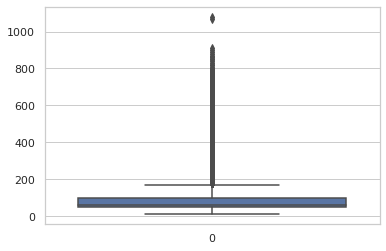

In [ ]:

# Find outliers
sorted_appliances = df1.sort_values('Appliances',ascending=False)
print("The number of the 0,1% top values of appliances' load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",
      sorted_appliances.Appliances[19], "Wh.")

# boxplot appliances
sns.set(style="whitegrid")
ax = sns.boxplot(sorted_appliances.Appliances)

In [ ]:

# Outliers removal

df1 = df.dropna()
df1 = df.drop(df[(df.Appliances>140)|(df.Appliances<0)].index)

In [ ]:
df2 = df1.copy()

In [ ]:
# Dropping the month, week,year column as we are done with EDA
df2.drop(columns = (['month', 'week', 'year']), inplace = True)

## What all manipulations have you done and insights you found?

We extracted the month, hour and week values from the date column by setting the index of the dataset as date. Then we allocated these values in the new columns. 

We calculated the average of the all the energy used by the Appliances in a hour and then created a new feature hour_avg which has all the avg values of an hour in it. 

We created two new features called Low_Consum(Low consumption) and High_Consum(High Consumption). These columns have 0s and 1s in their values that imply if the hourly average energy used is less than Applainces+25 then its Low consumption and if the hourly average energy used is greater than Applainces+100 then its High consumption

## *** Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart - 1

In [ ]:
values = list(df['hour_avg'].unique())
values

[161.35265700483092,
 190.36452004860269,
 143.06569343065692,
 126.98296836982968,
 96.4963503649635,
 69.14841849148418,
 56.982968369829685,
 52.78588807785888,
 51.32603406326034,
 49.07542579075426,
 48.236009732360095,
 49.35523114355231,
 52.737226277372265,
 57.71289537712895,
 78.64963503649635,
 106.14355231143553,
 112.78588807785889,
 125.37712895377129,
 133.12652068126522,
 123.63746958637469,
 124.74452554744525,
 108.28467153284672,
 105.82725060827251,
 119.90267639902676]

In [ ]:
names = []
for i in range(24):
  names.append(str(i))

<Axes: >

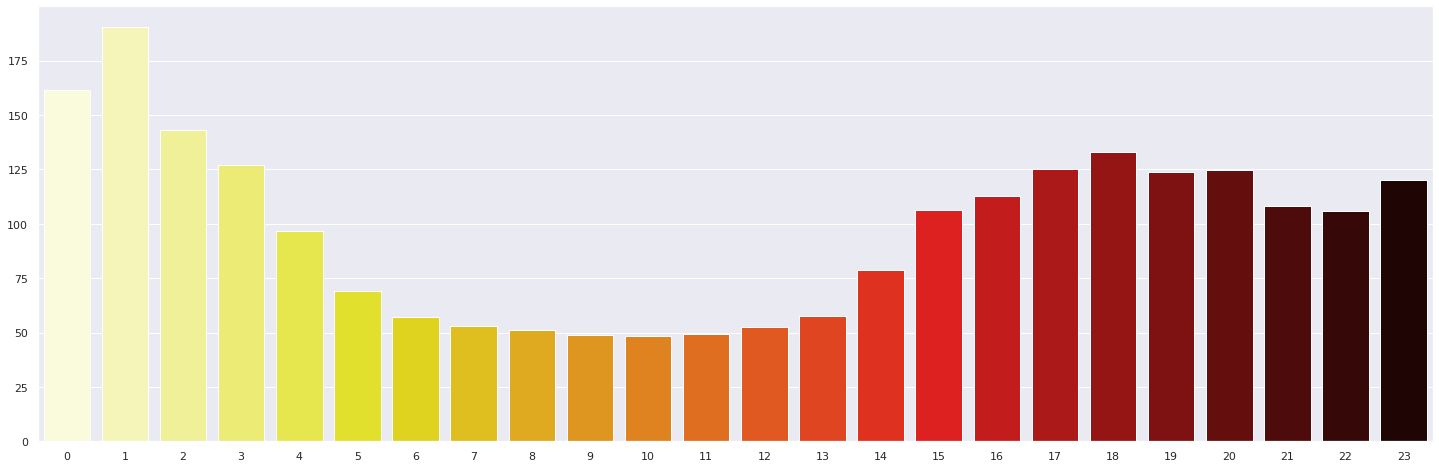

In [ ]:
sns.set(rc={'figure.figsize':(25,8)})
sns.barplot(x = names, y =  values, palette = 'hot_r')

### 1. Why did you pick the specific chart?

BarPlot is a plot from matplotlib library which is similar to the countplot and is used to distinguish two values effectively

### 2. What is/are the insight(s) found from the chart?

The average energy usage is at its highest during the 18th hour.

### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Energy is higher in certain hour of the day and it can fixed by being consicous about energy usage at that hour.

## Chart - 2

###Checking the variations of temperatures among all the rooms of the building

In [ ]:
# assigning values to variables for plots
T1 = df['T1'].values.mean()
T2 = df['T2'].values.mean()
T3 = df['T3'].values.mean()
T4 = df['T4'].values.mean()
T5 = df['T5'].values.mean()
T7 = df['T7'].values.mean()
T8 = df['T8'].values.mean()
T9 = df['T9'].values.mean()
# We have not included the temps T6 and T_out as they are the temps from outside.

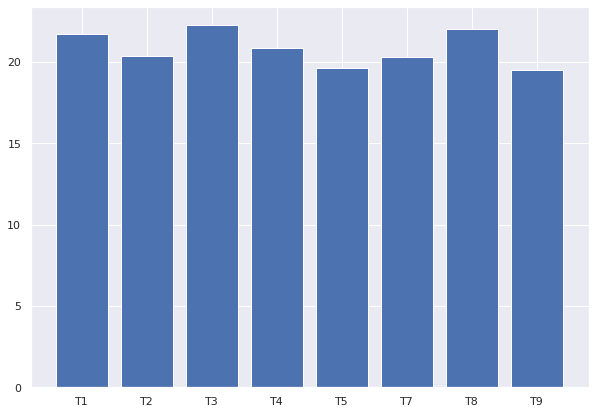

In [ ]:

# Figure Size
fig = plt.figure(figsize =(10, 7))
values = [T1,T2,T3,T4,T5,T7,T8,T9]
names = ['T1','T2','T3','T4','T5','T7','T8','T9']
# Horizontal Bar Plot
plt.bar(names, values)
 
# Show Plot
plt.show()

### 1. Why did you pick the specific chart?

BarPlot is a plot from matplotlib library which is similar to the countplot and is used to distinguish two values effectively

### 2. What is/are the insight(s) found from the chart?

#####The warmest temperatures are  laundry room(T3), teenager room(T8) and kitchen area(T1) respectively. And the coldest rooms are bathroom(T5) and parents room(T9).

### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Temperatuure is proportional to Energy use so the rooms with higher temps should be controlled.

# Checking the energy variations with respect to temperatures outside the building

## Chart - 3

In [ ]:
# assigning values to variables for plots
T6 = df['T6'].values
T_out = df['T_out'].values
Appliance_energy = df['Appliances'].values

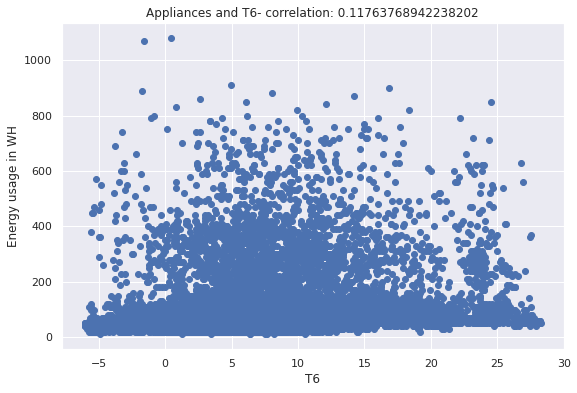

In [ ]:
#scatter plot of Temperature vs Energy usage
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['T6']
label = df['Appliances']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('T6')
plt.ylabel('Energy usage in WH')
ax.set_title('Appliances and' + ' T6' + '- correlation: ' + str(correlation))


plt.show()

### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

### 2. What is/are the insight(s) found from the chart?

##### The correlation is minute but it exists between energy use and temperature northside of the building. The energy usage stays consistent from temperatures 5° to 25°. At extreme high and low temperatures, the energy usage is relatively low.

### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot shows that the temperatures should be checked outside the building so Air Conditioners are used less.

## Chart - 4

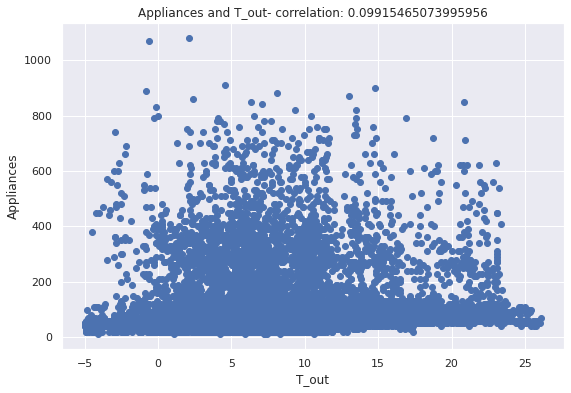

In [ ]:
#scatter plot of Temperature vs Energy usage
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['T_out']
label = df['Appliances']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('T_out')
plt.ylabel('Appliances')
ax.set_title('Appliances and' +' T_out' + '- correlation: ' + str(correlation))


plt.show()

### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

### 2. What is/are the insight(s) found from the chart?

##### There is little correlation between temperatures in neighbourhood and energy usage. There is an acute drop at extreme highs and lows in temperature.

### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot shows that the temperatures should be checked outside the building so Air Conditioners are used less.

# Variations in Energy consumption with respect to Pressure

## Chart - 5

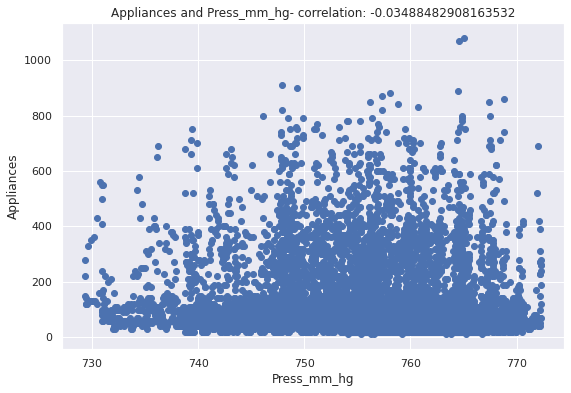

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Press_mm_hg']
label = df['Appliances']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Press_mm_hg')
plt.ylabel('Appliances')
ax.set_title('Appliances and' + ' Press_mm_hg' + '- correlation: ' + str(correlation))


plt.show()

### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

### 2. What is/are the insight(s) found from the chart?

##### There is little to  no correlation between pressure and energy consumption.

### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The humidity values should not be kept in checked as there is no correlation

# Energy variation with respect to humidity in different rooms of building.

## Chart - 6

In [ ]:
# assigning values to variables for plots
RH1 = df['RH_1'].values.mean()
RH2 = df['RH_2'].values.mean()
RH3 = df['RH_3'].values.mean()
RH4 = df['RH_4'].values.mean()
RH5 = df['RH_5'].values.mean()
RH6 = df['RH_6'].values.mean()
RH7 = df['RH_7'].values.mean()
RH8 = df['RH_8'].values.mean()
RH9 = df['RH_9'].values.mean()
RH_out = df['RH_out'].values.mean()

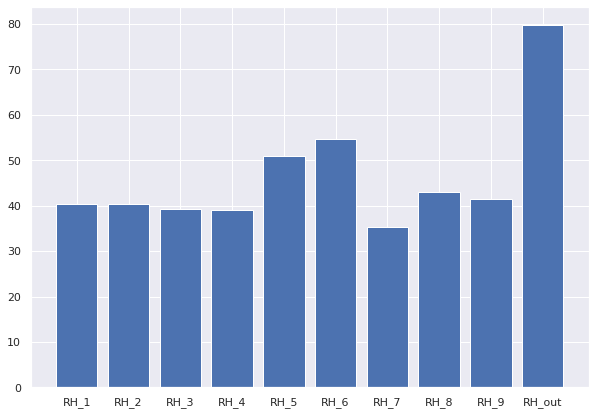

In [ ]:
# Figure Size
fig = plt.figure(figsize =(10, 7))
values = [RH1,RH2,RH3,RH4,RH5,RH6,RH7,RH8,RH9,RH_out]
names = ['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']
# Horizontal Bar Plot
plt.bar(names, values)
 
# Show Plot
plt.show()

### 1. Why did you pick the specific chart?

BarPlot is a plot from matplotlib library which is similar to the countplot and is used to distinguish two values effectively

### 2. What is/are the insight(s) found from the chart?

##### The humidity is at its highest outside the building(RH_out) and lowest in the ironing room(RH_7).

### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The highest is outside and the lower values should be increased so that enrgy used decreases.

## Chart - 7

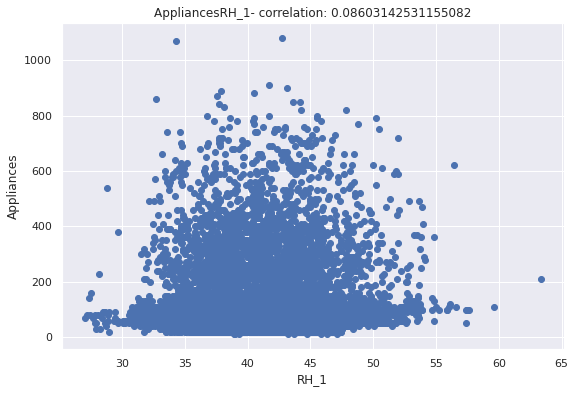

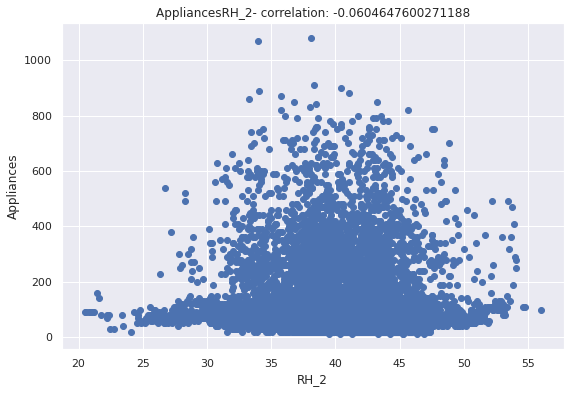

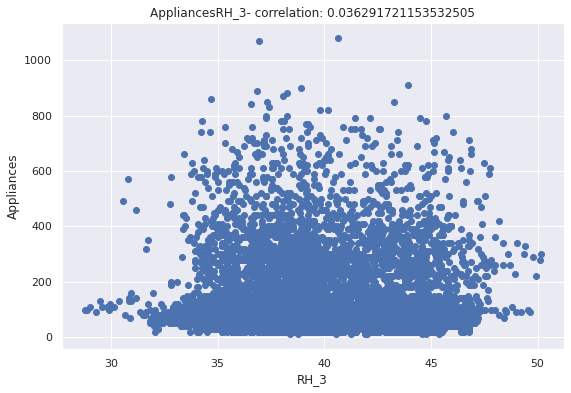

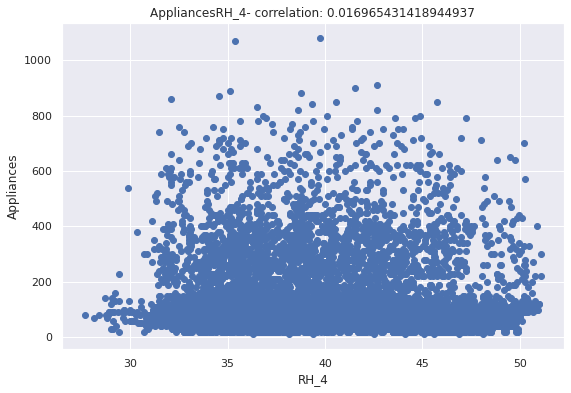

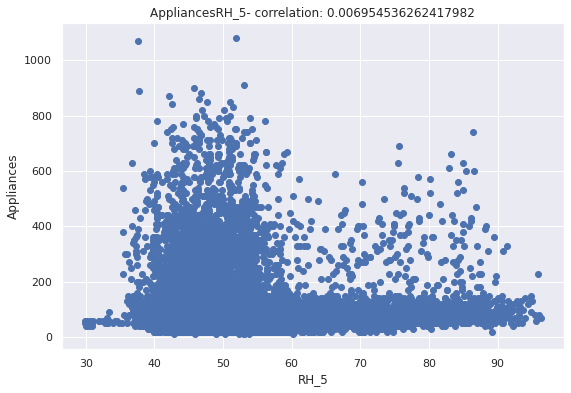

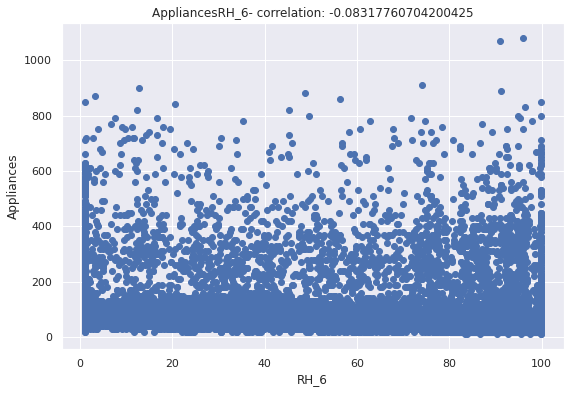

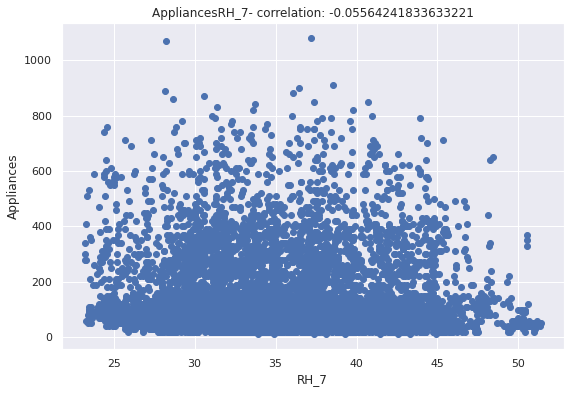

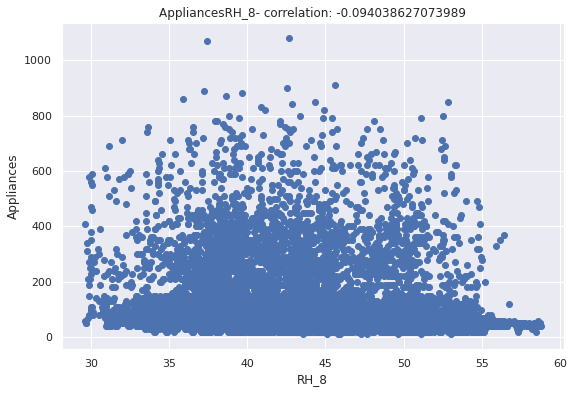

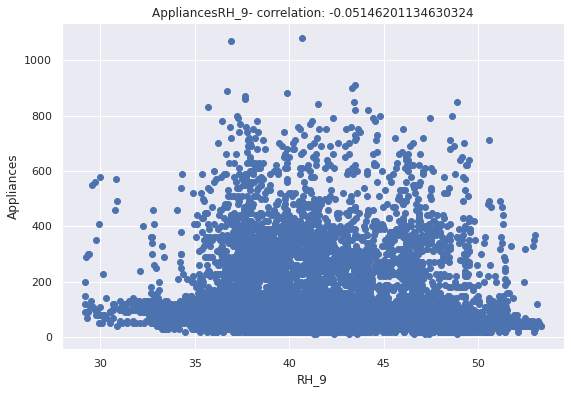

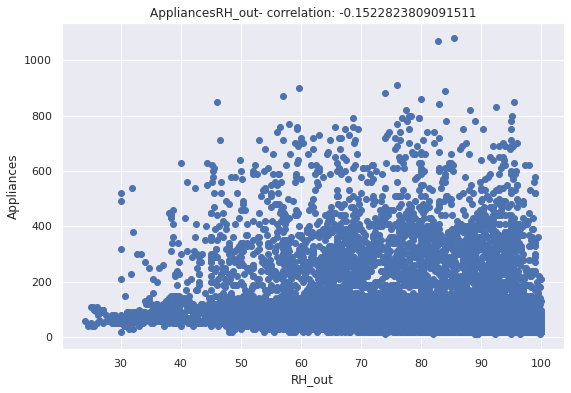

In [ ]:


# obtaining correlation plots between humidity values and energy comsumption.
for i in names:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[i]
    label = df['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(i)
    plt.ylabel('Appliances')
    ax.set_title('Appliances' + i + '- correlation: ' + str(correlation))

plt.show()


### 1. Why did you pick the specific chart?

### 2. What is/are the insight(s) found from the chart?

###All the scatterplots between humidity among different rooms of the building and energy cosumption:

1.Humidity in kitchen area shows a normal distribution w.r.t energy consumption.Little to no consumption after humidity reaches >50.

2.Very low energy consumption for humidity levels of 20 to 30 in the living room with sudden increase to adjacent levels of humidity.

3.Humidty in laundry room influences the energy consumption similar to that of living room.

4.Little to no contribution from humidity levels of office room towards energy consumption.

5.No influence by humidity levels of bathroom towards energy consumption.

6.Energy consumption may be inversely correlated to the humidity levels of northside outside of the building.

7.Energy consumption is highly inversely correlated to  humidity levels of neighbourhood of the building.


### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Energy use increases with decrease in the humidity values.

## Chart - 8

In [ ]:
df1['month'].unique()

array([1, 2, 3, 4, 5])

# The data has been collected from months January to May

In [ ]:
#Creating a dataframe with respect to the month column's sum
df_month = df.groupby('month').sum()

array([<Axes: ylabel='Appliances'>], dtype=object)

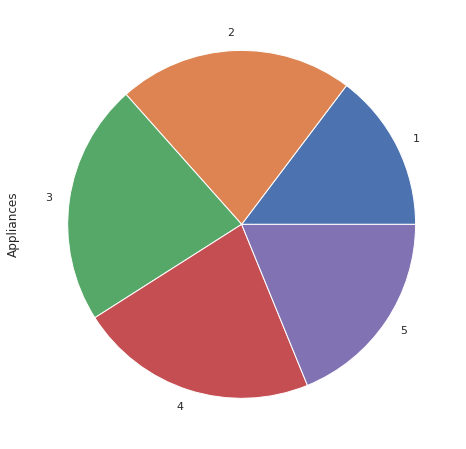

In [ ]:
# Pie chart of dataframe of month versus Appliances column
df_month['Appliances'].plot(kind='pie', subplots=True, figsize=(8, 8))

### 1. Why did you pick the specific chart?

Piechart is a chart from matplolib library which is really helpful in representing the values occupied by certain values in a variable

### 2. What is/are the insight(s) found from the chart?



##### From this Pie chart we can observe that in Feb, Mar, April, the usage of appliances is more or less equal and that of Jan was the lowest one

### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Janurary month has the lowest Energy use maybe because the temperature is lowest in that month.

## Chart - 9

In [ ]:
# Functions to be used from the plots

def daily(x,df=df1):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()

def monthly_daily(x,df=df):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

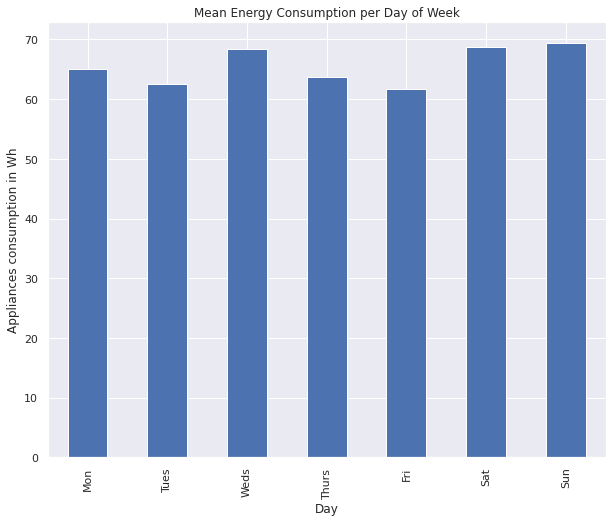

In [ ]:
# Plot of Mean Energy Consumption per Day of Week

daily('Appliances').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

### 1. Why did you pick the specific chart?

BarPlot is a plot from matplotlib library which is similar to the countplot and is used to distinguish two values effectively

### 2. What is/are the insight(s) found from the chart?

##### Energy Usage was obeserved to be at its peak on Monday and it was it's lowest on Tuesday. There was high usage of Appliances on weekend i.e Friday, Saturday, Sunday than compared to weekdays. so, we reject the null hypothesis.

### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Monday is the busiest day of the week so it's a given that it will have the most energy used in a week.

## Chart - 10

In [ ]:
#Checking if all the hours of a day are considered or not
df['hour'].unique()

array([17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16])

In [ ]:
#Creating another dataframe with respect to the hour column's sum
df_hourly = df.groupby('hour').sum()['Appliances']

In [ ]:
df_hourly.head()

hour
0    43390
1    42190
2    40340
3    39650
4    40570
Name: Appliances, dtype: int64

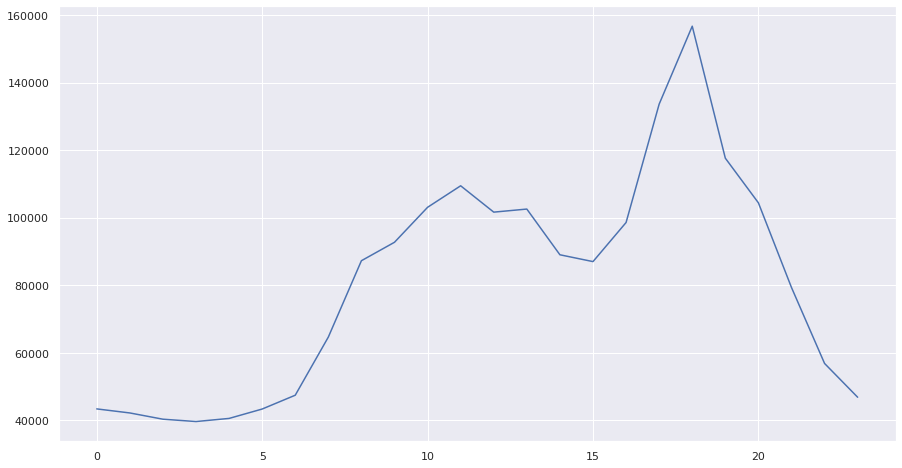

In [ ]:
# Line plot of hour vs Appliances(hour is on X-axis)
plt.figure(figsize=(15,8))
plt.plot(df_hourly)
plt.show()

### 1. Why did you pick the specific chart?

LinePlot is a plot from matplotlib library which helps in visualization the rate of increment or decrement of a value with respect to another value.

### 2. What is/are the insight(s) found from the chart?

##### From this line plot, the usage of appliances is a steady rise starting from 12 am and hits peak aroud 18th hour of the day. Then, after hitting its peak it takes a sudden dip starting from 21ist hour. The underlying reason might be because its night time and people probably will be less active.

### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Energy is higher in certain hour of the day and it can fixed by being consicous about energy usage at that hour.

## Chart - 11

In [ ]:
#Checking the unique values of the week column
df['week'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])

***The data has been collected for 20 weeks starting from Jan 1 to May 27.***

In [ ]:
##Creating another dataframe with respect to the week column's sum
df_weekly = df.groupby('week').sum()['Appliances']

In [ ]:
df_weekly.head()

week
2    110490
3     96960
4     76060
5     99680
6    114070
Name: Appliances, dtype: int64

<Axes: xlabel='week'>

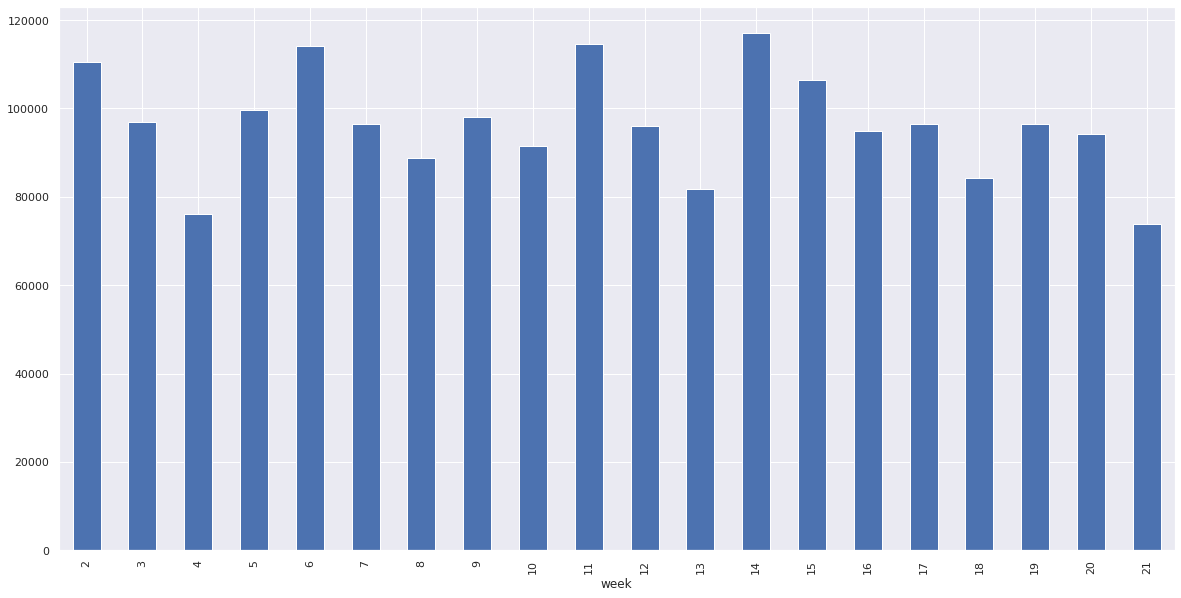

In [ ]:
#Bar plot which shows the usage of appliances in a week
fig, ax = plt.subplots(figsize=(20,10))
df_weekly.plot(kind='bar', ax=ax)

### 1. Why did you pick the specific chart?

BarPlot is a plot from matplotlib library which is similar to the countplot and is used to distinguish two values effectively

### 2. What is/are the insight(s) found from the chart?

##### This bar plot shows that at week 14 i.e, the second week of April, the usage of appliances is the highest and on the other hand, its lowest in the last week of the period i.e, the fourth week of May.

### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The energy is scattered unevenly among all the weeks from Jan and May

In [ ]:
#Extracting the year from the date column
year = []
for i in range(len(df['date'])):
  year.append(df['date'][i].year)
df['year'] = year  

In [ ]:
df1['year'].unique()

array([2016])

# This data collection was collected in the year 2016

In [ ]:
df2 = df1.copy()

In [ ]:
# Dropping the month, week,year column as we are done with EDA
df2.drop(columns = (['month', 'week', 'year']), inplace = True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17293 entries, 0 to 19731
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         17293 non-null  datetime64[ns]
 1   Appliances   17293 non-null  int64         
 2   lights       17293 non-null  int64         
 3   T1           17293 non-null  float64       
 4   RH_1         17293 non-null  float64       
 5   T2           17293 non-null  float64       
 6   RH_2         17293 non-null  float64       
 7   T3           17293 non-null  float64       
 8   RH_3         17293 non-null  float64       
 9   T4           17293 non-null  float64       
 10  RH_4         17293 non-null  float64       
 11  T5           17293 non-null  float64       
 12  RH_5         17293 non-null  float64       
 13  T6           17293 non-null  float64       
 14  RH_6         17293 non-null  float64       
 15  T7           17293 non-null  float64       
 16  RH_7

***All columns are of desirable data type***

## Chart - 12

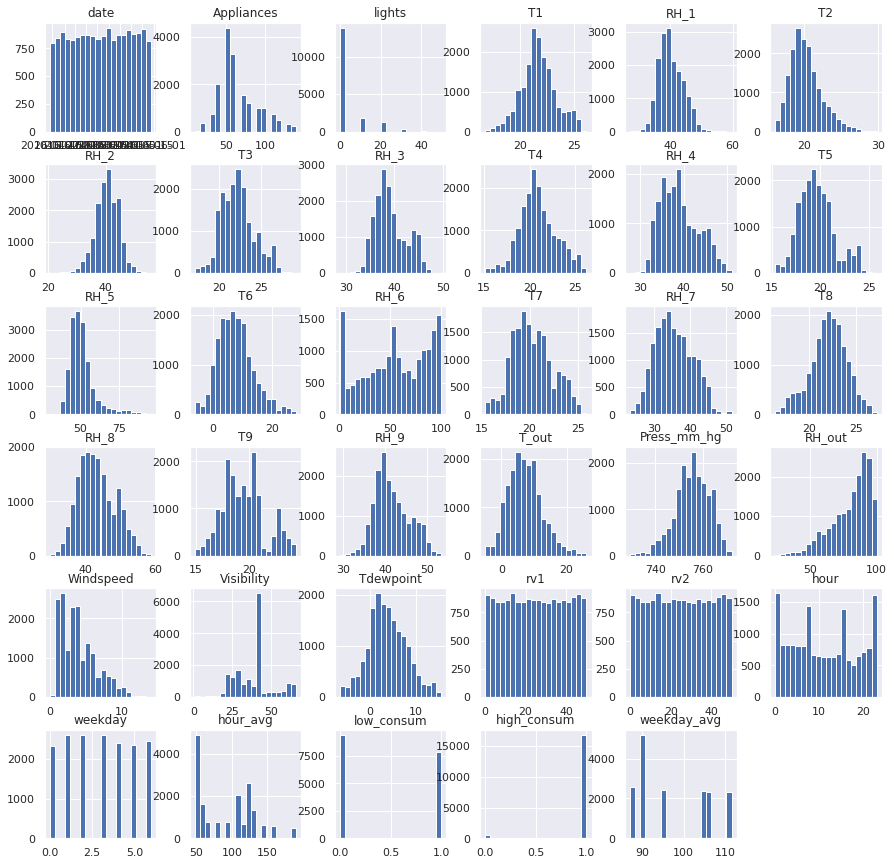

In [ ]:
# Histogram of all the features to understand the distribution
df2.hist(bins = 20 , figsize= (15,15 )) ;


### 1. Why did you pick the specific chart?

Histogram is a plot from matplotlib library which really helps getting the distribution of values of a variable

### 2. What is/are the insight(s) found from the chart?

#####We have plotted the numeric features using histogram and we can see that except customer service calls, Total intl calls ,Number vmail messages, the features are normally distributed with little to no skewness. Thus the variables are as gaussian distribution.

### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No Business impact. Just to see that whether the distriution is skewed or of gaussian distributon or not.

## Chart - 14 

<ipython-input-68-bceb2c06ec1f>:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



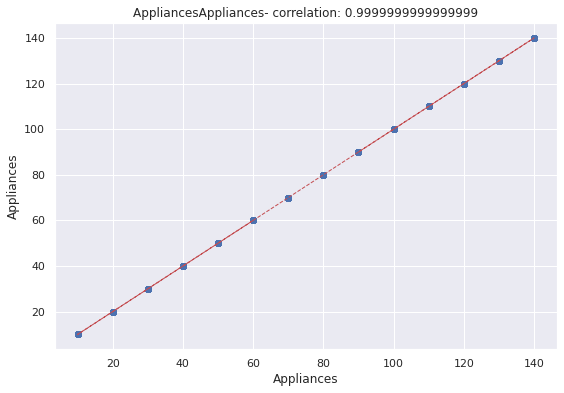

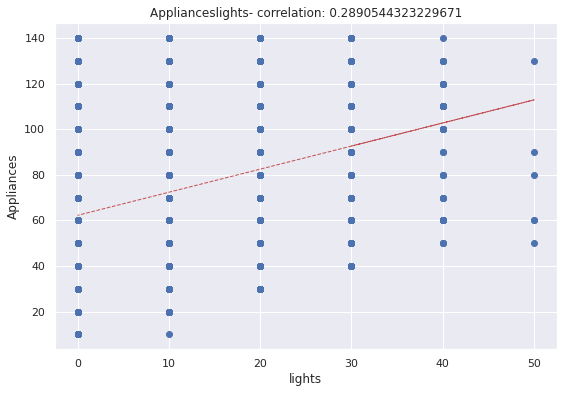

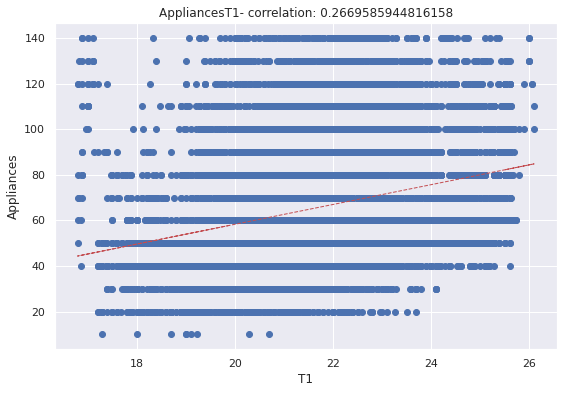

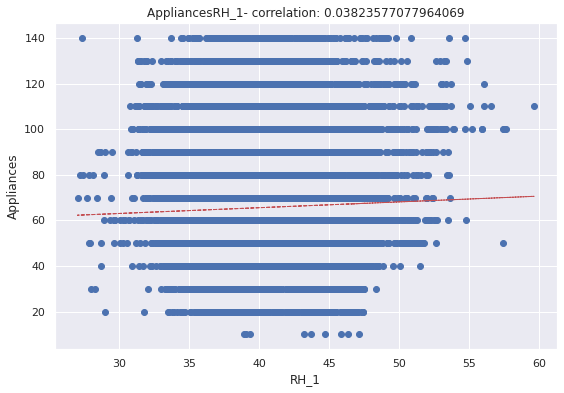

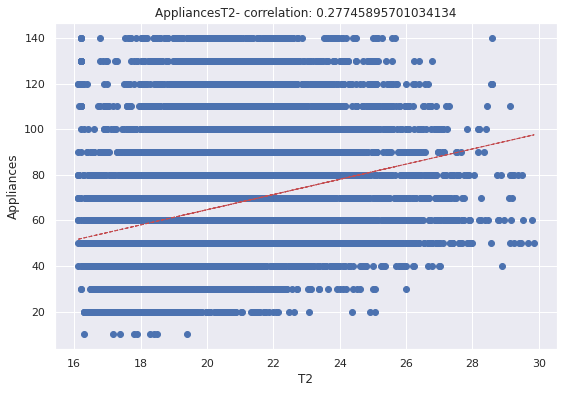

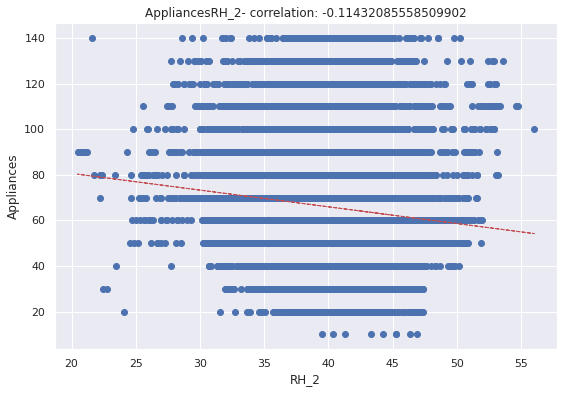

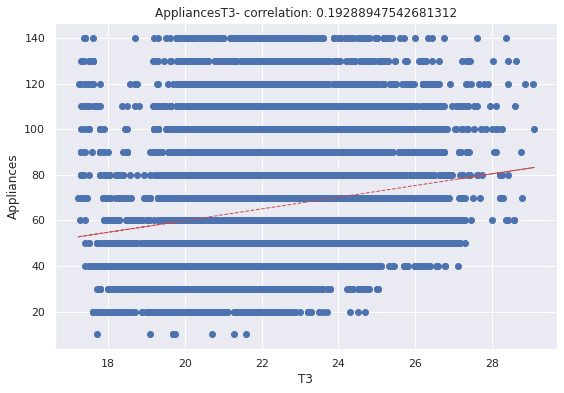

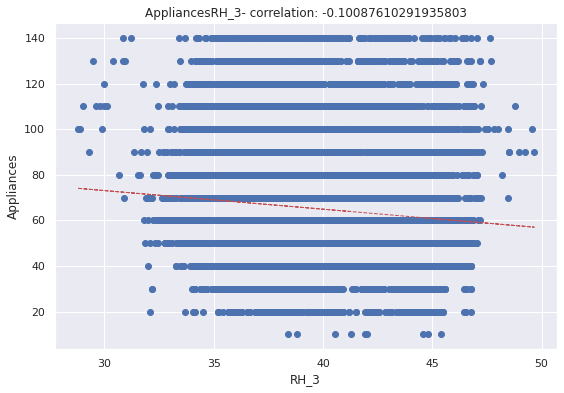

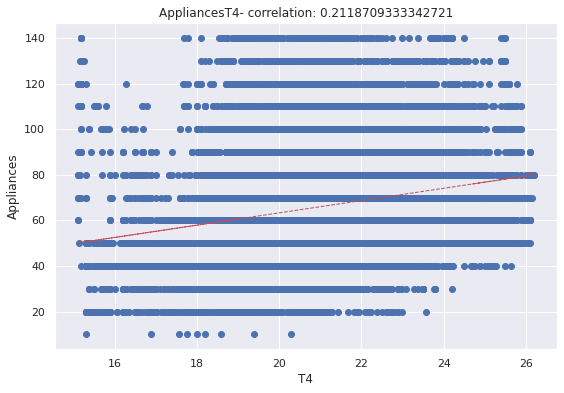

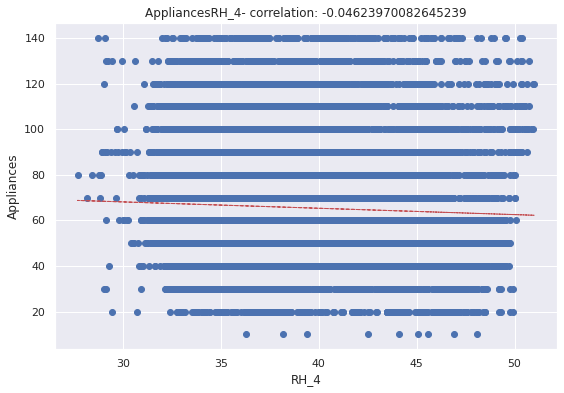

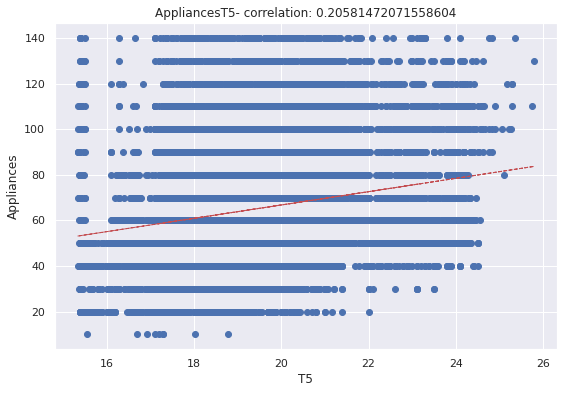

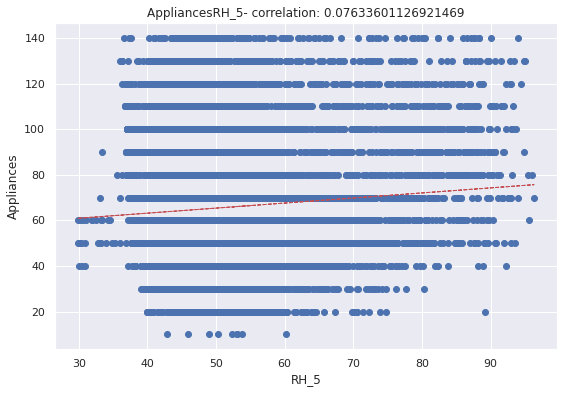

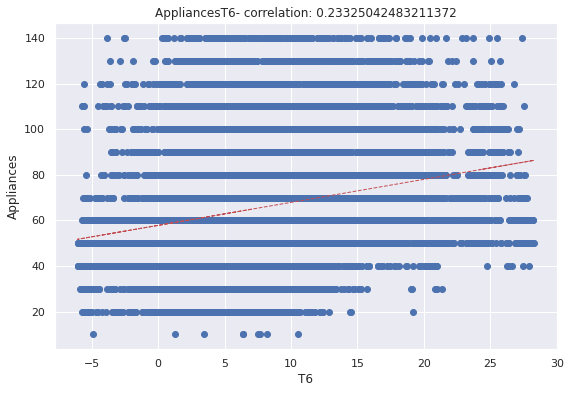

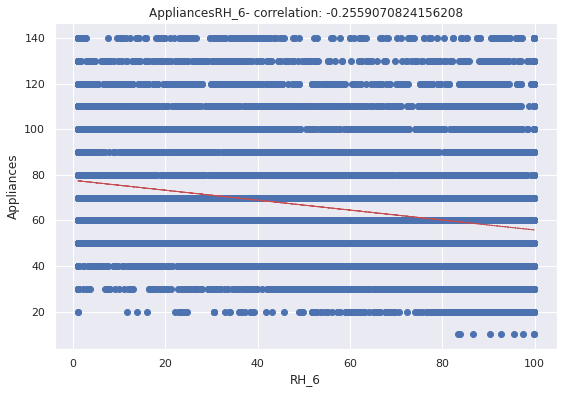

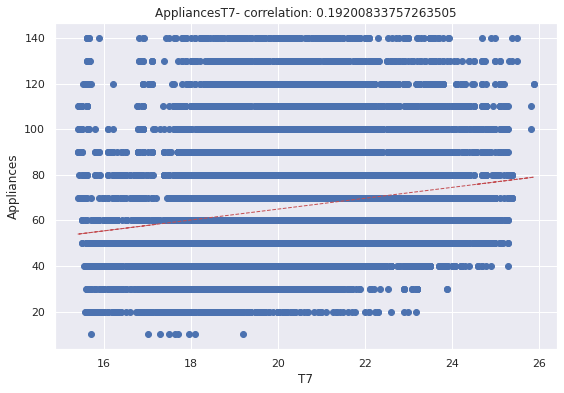

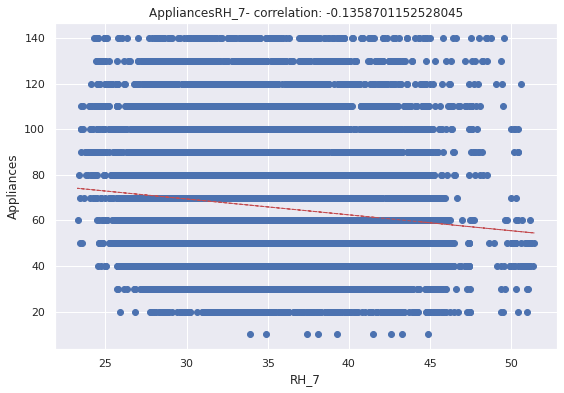

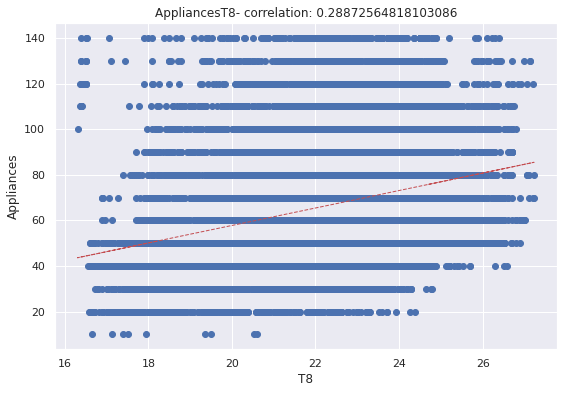

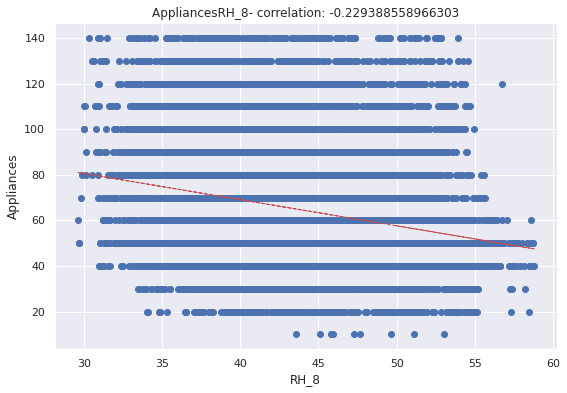

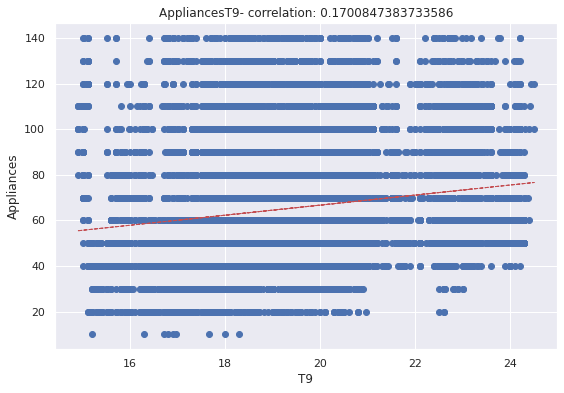

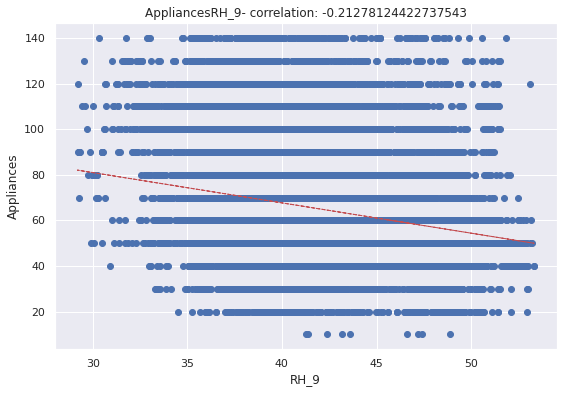

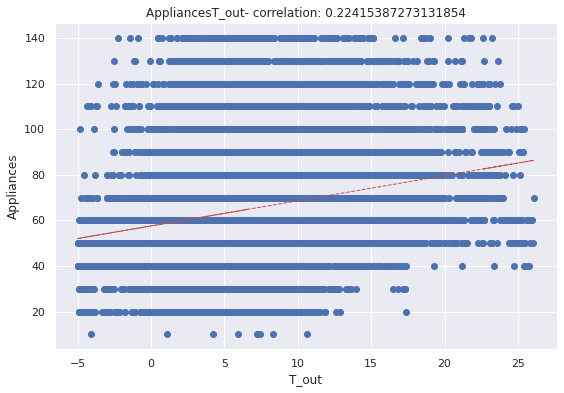

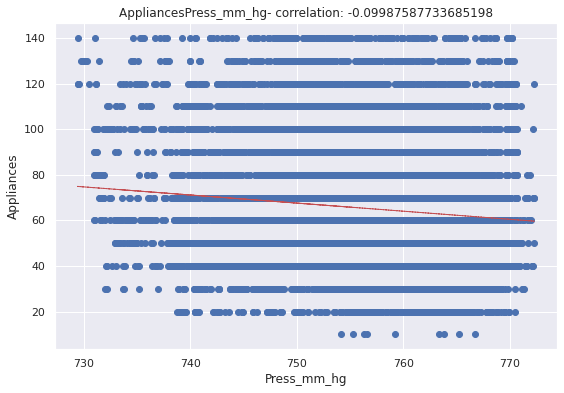

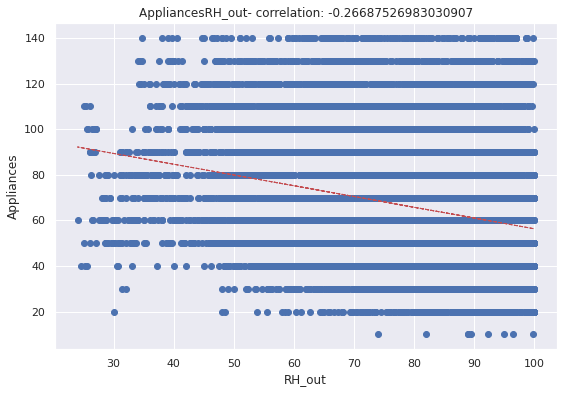

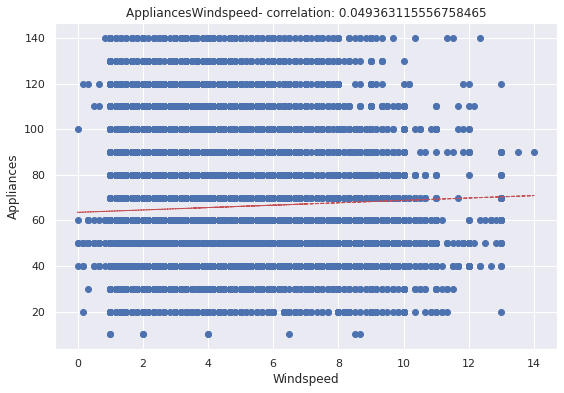

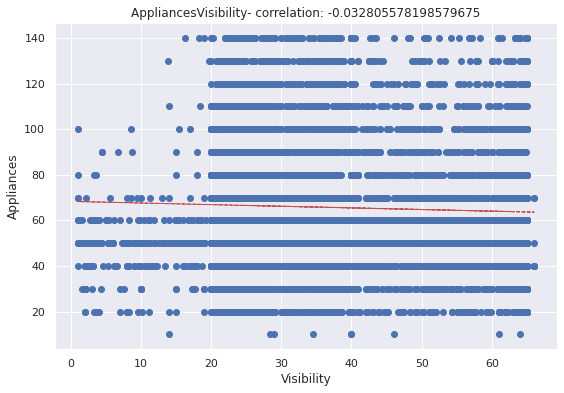

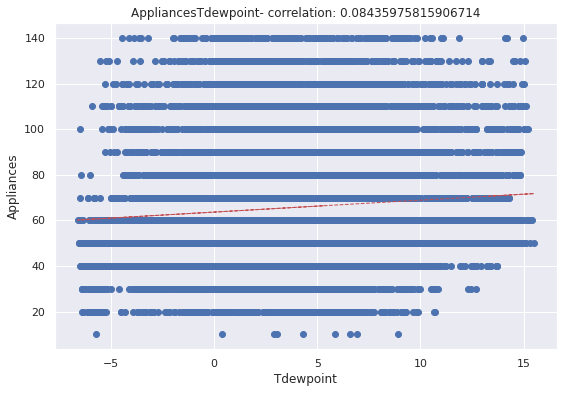

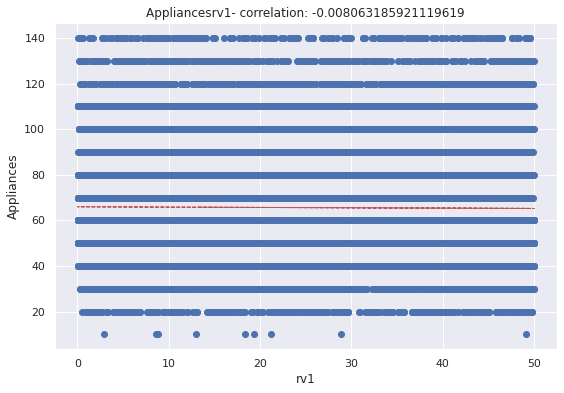

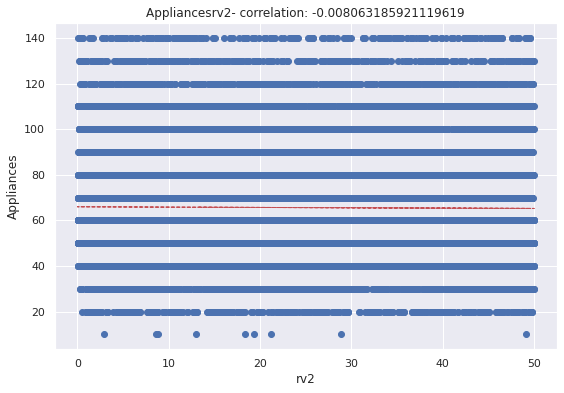

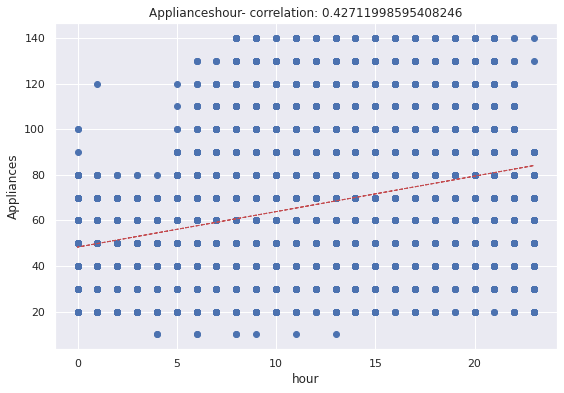

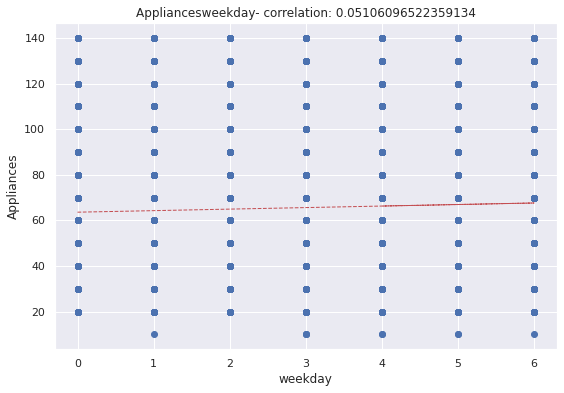

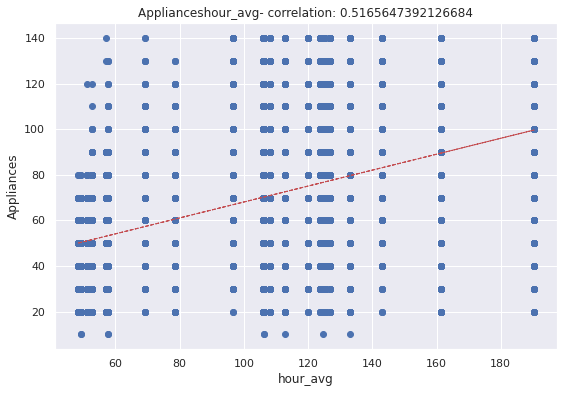

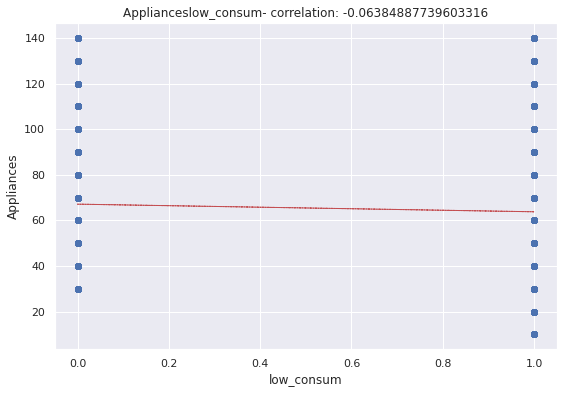

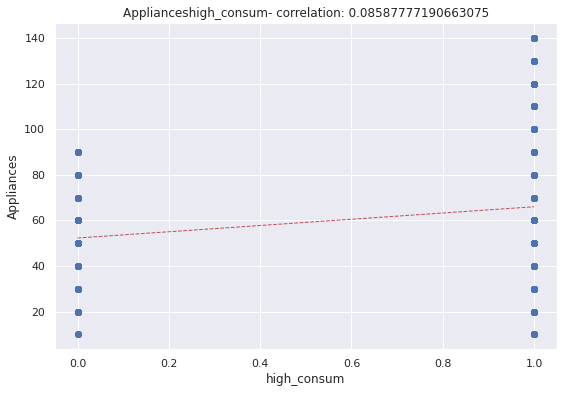

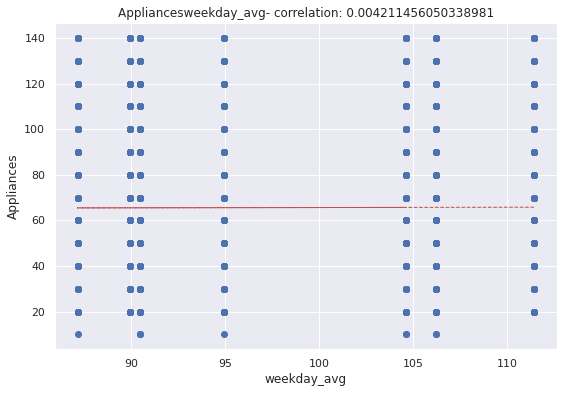

In [ ]:

# obtaining correlation plots between dependent and independent variables

numeric_features = df2.columns
for col in numeric_features[1:]:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = df2[col]
  label = df2['Appliances']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Appliances')
  ax.set_title('Appliances' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df2[col], df2['Appliances'], 1)
  y_hat = np.poly1d(z)(df2[col])

  plt.plot(df2[col], y_hat, "r--", lw=1)

plt.show()

### This is the correlation of all the values of Dependent variable with Independent variable values and plotting the best fit line.

In [ ]:
# function to calculate Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in double_scalars



,variables,VIF
0,lights,1.596159
1,T1,3991.660438
2,RH_1,2209.593247
3,T2,2703.330939
4,RH_2,2497.241777
5,T3,1540.605036
6,RH_3,1964.792241
7,T4,1182.800898
8,RH_4,1496.580945
9,T5,1236.824148


In [ ]:
df2.drop(columns=['rv2'],axis=1,inplace=True)

In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date' ]]])

,variables,VIF
0,lights,1.596159
1,T1,3991.660438
2,RH_1,2209.593247
3,T2,2703.330939
4,RH_2,2497.241777
5,T3,1540.605036
6,RH_3,1964.792241
7,T4,1182.800898
8,RH_4,1496.580945
9,T5,1236.824148


In [ ]:
df2.drop(columns=['T1'],axis=1,inplace=True)

In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.595936
1,RH_1,1718.066939
2,T2,1615.538820
3,RH_2,2018.523834
4,T3,1315.712465
5,RH_3,1964.066329
6,T4,1137.438301
7,RH_4,1495.880122
8,T5,1217.175549
9,RH_5,46.985527


In [ ]:
df2.drop(columns=['T9'],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.564687
1,RH_1,1716.385088
2,T2,1612.656317
3,RH_2,1996.045951
4,T3,1250.301702
5,RH_3,1952.967884
6,T4,1116.883993
7,RH_4,1495.786292
8,T5,1102.661350
9,RH_5,46.661701


In [ ]:
df2.drop(columns=['Press_mm_hg'],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.553869
1,RH_1,1682.408561
2,T2,1599.304657
3,RH_2,1924.517962
4,T3,1246.207043
5,RH_3,1924.909047
6,T4,1080.585990
7,RH_4,1484.662239
8,T5,1068.209123
9,RH_5,46.643867


In [ ]:
df2.drop(columns=['RH_2', 'T2','RH_1', 'RH_4', 'RH_3','T7','T5'],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.486965
1,T3,960.678614
2,T4,659.545452
3,RH_5,43.448236
4,T6,69.455680
5,RH_6,34.715707
6,RH_7,367.541588
7,T8,583.239913
8,RH_8,490.062366
9,RH_9,515.130459


In [ ]:
df2.drop(columns=['T3', 'T4','RH_7', 'RH_8', 'RH_9','RH_out', 'T_out'],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.402258
1,RH_5,38.021328
2,T6,20.300045
3,RH_6,13.994624
4,T8,128.147121
5,Windspeed,4.432549
6,Visibility,11.253760
7,Tdewpoint,7.601531
8,rv1,3.955023
9,hour,5.398362


In [ ]:
df2.drop(columns=['RH_5', 'T6', 'T8',],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date' ]]])

,variables,VIF
0,lights,1.393501
1,RH_6,5.128222
2,Windspeed,3.958552
3,Visibility,10.729666
4,Tdewpoint,1.982583
5,rv1,3.911823
6,hour,5.252190
7,weekday,3.354533
8,hour_avg,17.531420
9,low_consum,3.544815


In [ ]:
df2[df2.columns[:]].corr()['Appliances'][:]

Appliances     1.000000
lights         0.289054
RH_6          -0.255907
Windspeed      0.049363
Visibility    -0.032806
Tdewpoint      0.084360
rv1           -0.008063
hour           0.427120
weekday        0.051061
hour_avg       0.516565
low_consum    -0.063849
high_consum    0.085878
weekday_avg    0.004211
Name: Appliances, dtype: float64

In [ ]:
df2.drop(columns = (['hour_avg']), inplace =  True)


In [ ]:
df2.drop(columns = (['date']), inplace =  True)

In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date' ]]])

,variables,VIF
0,lights,1.363617
1,RH_6,4.981689
2,Windspeed,3.908007
3,Visibility,10.649605
4,Tdewpoint,1.982465
5,rv1,3.906655
6,hour,4.229578
7,weekday,3.335641
8,low_consum,2.103406
9,high_consum,29.452773


In [ ]:
df2.drop(columns = (['weekday_avg']), inplace =  True)

In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date' ]]])

,variables,VIF
0,lights,1.362085
1,RH_6,4.724216
2,Windspeed,3.833538
3,Visibility,9.658019
4,Tdewpoint,1.950302
5,rv1,3.804187
6,hour,4.035850
7,weekday,3.233047
8,low_consum,2.067424
9,high_consum,14.482475


In [ ]:
df2.drop(columns = (['weekday']), inplace =  True)

In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date' ]]])

,variables,VIF
0,lights,1.338248
1,RH_6,4.687564
2,Windspeed,3.813718
3,Visibility,9.652418
4,Tdewpoint,1.946860
5,rv1,3.796794
6,hour,3.993686
7,low_consum,2.066587
8,high_consum,13.623267


#The above column features are the ones which remained after removing multicollinearity

## Correlation Heatmap

<Axes: >

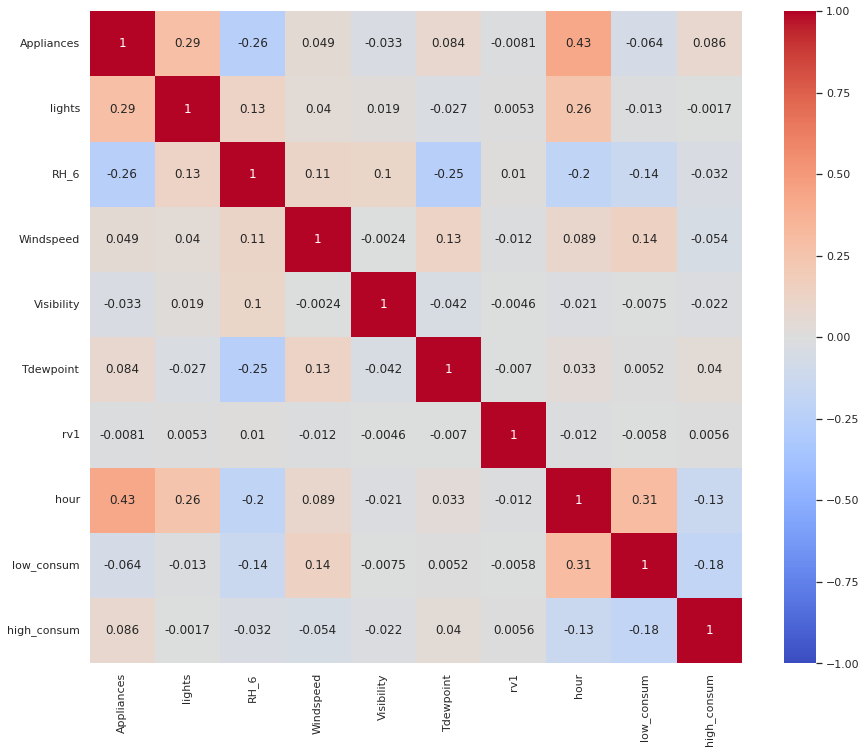

In [ ]:
#Heatmap after reducing the multicollenearity 
plt.figure(figsize=(15,12))
sns.heatmap(df2.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

### 1. Why did you pick the specific chart?

Correlation heatmap helps in getting the absolute correlation values of columns and their heatmap with intensity.

### 2. What is/are the insight(s) found from the chart?

These two correlation plots represent the correlation before and after droppin the highly correlation variable in the dataset

## Chart - 15 - Pair Plot 

In [ ]:
sns.pairplot(df, hue ='Appliances')

### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

### 2. What is/are the insight(s) found from the chart?

Pairplot helped us in visualizing the relationship among the columns.

## *** Hypothesis Testing***

# Hypothetical Statement - 1

# HYPOTHESIS : **Appliance usage on weekends is more than weekdays.**


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** : No, Weekends have no effect on appliance usage.

**Alternate Hypothesis** : Yes, Weekends do have an influence on appliance usage.

### ***We assume siginificance level to be 0.05***

#### 2. Perform an appropriate statistical test.

In [ ]:

hypo_data = pd.crosstab(df1['Appliances'], df1['weekday'], margins=False)
hypo_data

In [ ]:

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

p

### ***The p value is smaller than significance level , we will reject the null hypothesis and accept the alternative hypothesis.***

#### Which statistical test have you done to obtain P-Value?

We used Chi Square contingency to test the P value for the Hypthesis.

#### Why did you choose the specific statistical test?

The Chi Square contingency provides a foundation for statistical inference, where statistical tests question the relationship between the variables on the basis of the data observed.

# Hypothetical Statement - 2

# HYPOTHESIS : **Energy usage by Appliances is not Equal across all the months.**


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** : No, the Energy usage by appliances is equal across all the months. 

**Alternate Hypothesis** : Yes, the Energy usage by appliances is equal across all the months. 

### ***We assume siginificance level to be 0.05***

#### 2. Perform an appropriate statistical test.

In [ ]:
hypo_data = pd.crosstab(df1['Appliances'], df1['month'], margins=False)
hypo_data

In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

p

### ***The p value is smaller than significance level , we will reject the null hypothesis and accept the alternative hypothesis.***

##### Which statistical test have you done to obtain P-Value?

We used Chi Square contingency to test the P value for the Hypthesis.

##### Why did you choose the specific statistical test?

The Chi Square contingency provides a foundation for statistical inference, where statistical tests question the relationship between the variables on the basis of the data observed.

## *** Feature Engineering & Data Pre-processing***

###  Handling Missing Values

There weren't any missing or null values in the dataset

###  Handling Outliers

In [ ]:
# df1 = df.copy()
# # Find outliers
# sorted_appliances = df1.sort_values('Appliances',ascending=False)
# print("The number of the 0,1% top values of appliances' load is",
#       len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",
#       sorted_appliances.Appliances[19], "Wh.")

# # boxplot appliances
# sns.set(style="whitegrid")
# ax = sns.boxplot(sorted_appliances.Appliances)

In [ ]:

# Outliers removal

# df1 = df.dropna()
# df1 = df.drop(df[(df.Appliances>140)|(df.Appliances<0)].index)

### ***The following codes have been already executed in the notebook and have been used for plotting charts.***

### What all outlier treatment techniques have you used and why did you use those techniques?

Used the boxplot to check the outliers and capped the values 

###  Categorical Encoding

No categorical Columns in the dataset

###  Feature Manipulation & Selection

In [ ]:
df2.columns

###  Data Transformation

### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No in our case the data doesn't need to be transformed

###  Dimesionality Reduction

### Do you think that dimensionality reduction is needed? Explain Why?

In our case, Dimesionality Reduction isn't used because the variables are fairly less in number and is of desired dimension

###  Data Splitting

In [ ]:
# Creating the data of independent variables
Y = df2['Appliances']

# Create the dependent variable data
X = df2.drop(columns=['Appliances'],axis=1).values

In [ ]:
X

In [ ]:

# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### What data splitting ratio have you used and why? 

We allocated 80% of data to train the model and the remaining 20% for test the peformance of the model. 80-20 is ideal because it gives equal emphasis technically to both test and train datasets.

###  Data Scaling

In [ ]:

# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Which method have you used to scale you data and why?

MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

###  Handling Imbalanced Dataset

### Do you think the dataset is imbalanced? Explain Why.

No, the data isn't imbalanced

## *** ML Model Implementation***

#Linear Regression Model

In [ ]:

# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, Y_train)


In [ ]:

# Predicting the Train set results

Y_pred_train = regressor.predict(X_train)

In [ ]:

# Predicting the Test set results

Y_pred_test = regressor.predict(X_test)

In [ ]:

# r2 score of train set

r2_linear_train = r2_score(Y_train, Y_pred_train)

In [ ]:

r2_linear_train

In [ ]:

r2_linear_test = r2_score(Y_test, Y_pred_test)

In [ ]:
r2_linear_test

In [ ]:

# different metrics used

MSE  = mean_squared_error(Y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(Y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The R2 Score of the Linear Regression model 32% is not good, we should more models to get a performance gain

#Lasso Regression Model

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

In [ ]:
lasso =  lasso.score(X_train, Y_train)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

In [ ]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


In [ ]:

lasso  = Lasso(alpha=0.01 , max_iter= 3000)

lasso.fit(X_train, Y_train)

In [ ]:
Lasso =lasso.score(X_train, Y_train)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The R2 Score of the Linear Regression model 31% is not good, we should more models to get a performance gain

### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV for cross validation and to tune and optimize the hyperparameter 

### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No we didn't see any improvements after cross validation

### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset.

The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.

#Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,Y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The R2 Score of the Linear Regression model 31% is not good, we should more models to get a performance gain

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=1 , max_iter= 3000)

ridge.fit(X_train, Y_train)

In [ ]:
ridge = ridge.score(X_train, Y_train)

### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV for cross validation and to tune and optimize the hyperparameter 

### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No we didn't see any improvements after cross validation

#Decision Tree Regression Model

In [ ]:
# training model

from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train,Y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,Y_test)
r2_decision_test = best_DecisionTree.score(X_test,Y_test)

In [ ]:

# extracting best parameters

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")


### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The R2-score is close to 73% and its fair but not good enough. We want a model which is above 75% and around 80-85% which is ideal.

#Random Forest Regression Model

In [ ]:
# training model

from sklearn.ensemble import RandomForestRegressor
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [10,15,20],
         'min_samples_split':[2,4],
         'min_samples_leaf':[1,2],
         'bootstrap' : [True,False]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train,Y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,Y_test)
r2_randomforest_test = best_randomForest.score(X_test,Y_test)


In [ ]:

# getting best parameters

print(f"The best Random Forest R2 train score is : {gridSearch_RandomForest.best_score_} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Random Forest R2 test score is : {bestRandomForest_testScore} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")



###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The R2-score is really good that is  79%. We are really close to 80%, we can implement more models to get that one 1%

#Extra Trees Regression Model

In [ ]:
# training model

from sklearn.ensemble import ExtraTreesRegressor
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [50,80,100],
         'min_samples_split':[1,4,8],
         'min_samples_leaf':[1,2,3],
         'bootstrap' : [True,False]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(X_train,Y_train)

best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(X_test,Y_test)
r2_extratree_test = best_ExtrasTrees.score(X_test,Y_test)

In [ ]:

# getting best parameters

print(f"The best Extra Trees R2 score is : {gridSearch_ExtraTrees.best_score_} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Extra Trees R2 test score is : {bestExtrasTrees_testScore} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")


     

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The R2-score is the best that is  80%. We have reached 80% accuracy which is really ideal for Regression problem

#XGBoost Regresion Model

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train,
         Y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
r2_XGBoost_test = xgb_grid.best_score_


### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The R2-score is really good that is  76%. We passed the 75% mark but we can implement more models to get 80% model performance

In [ ]:

# creating a list of all model names
model_list = ['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree Regressor','Random Forest Regressor','Extra Trees Regressor', 'XGBoost Regressor']


In [ ]:

# creating a list of all model r2 score results from above

result_list = [r2_linear_test,Lasso,ridge,r2_decision_test,r2_randomforest_test,r2_extratree_test, r2_XGBoost_test]


In [ ]:

# creating an empty dataframe

results_df = pd.DataFrame()



In [ ]:

# adding above lists to the empty dataframe

results_df['model name'] = model_list
results_df['R2-score'] = result_list



In [ ]:
# dataframe containing results from all the above models used

results_df


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset. Simply put, it is the difference between the samples in the dataset and the predictions made by the model.

By accurately and precisely predicting the usage of Appliance Energy in a household, we can take appropriate measures to control it and preserve energy

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Extra trees regression model is the best one with an R2 score of 80% and it can really help in solving this regression problem

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

###Implement Explain Like Iam 5 Model Explainability Tool

In [ ]:
!pip install eli5

In [ ]:
import eli5 as eli

In [ ]:
features = list(df2.columns)
features.remove('Appliances')

In [ ]:
# Weights for Extra Trees
eli.explain_weights(best_ExtrasTrees, feature_names=features)

As we can see from ELI5, the 'hour' feature holds the most weight against all the other features. 

# **Conclusion**

#Conclusion from EDA

● On average, the household energy appliances usage was at its peak during the 18th hour of the day.

● The warmest temperatures are the laundry room(T3), teenager room(T8) and kitchen area(T1) respectively. And the coldest rooms are bathroom(T5) and parents room(T9) 

● The energy usage stays consistent from temperatures 5° to 25°. At extreme high and low temperatures, the energy usage is relatively low 

● There is little to no correlation between pressure and energy consumption 

● The humidity is at its highest outside the building(RH_out) and lowest in the ironing room(RH_7) 

● In Feb, Mar, April, the usage of appliances is more or less equal and that of Jan was the lowest one 

● At week 14 i.e, the second week of April, the usage of appliances is the highest and on the other hand, its lowest in the last week of the period i.e, the fourth week of May

# Conclusion from Machine Learning

1.From the above results dataframe, the Extra Tres Regressor model is the best model with accuracy of 80% for this dataset.

2.Decision Tree Regressor had an accuracy of less than 73% which is not desirable.

3.Feature Engineering really helped us reach this accuracy.

4.We have extracted sensible and appropriate information using Exploratory Data Analysis.